In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
csvpath_chi_09 = os.path.join('2009,2019 Weather CSV', 'Chicago 2009.csv')
csvpath_chi_19 = os.path.join('2009,2019 Weather CSV', 'Chicago 2019.csv')

In [3]:
with open(csvpath_chi_09) as csvfile_chi_09:
    csvreader_chi_09 = csv.reader(csvfile_chi_09, delimiter=",")
    csv_header = next(csvreader_chi_09) 
    chi_09_df_first = pd.DataFrame(csvreader_chi_09)
    
with open(csvpath_chi_19) as csvfile_chi_19:
    csvreader_chi_19 = csv.reader(csvfile_chi_19, delimiter=",")
    csv_header = next(csvreader_chi_19) 
    chi_19_df_first = pd.DataFrame(csvreader_chi_19)

    

In [22]:
chi_09_df = chi_09_df_first.rename(columns={0:"Date", 1:"Temp Avg", 2:"Temp Min", 3:"Max Temp",4:"Precipitation", 5:"Snow", 6:"Wind Speed"})
chi_09_df['Month'] = pd.DatetimeIndex(chi_09_df['Date']).month
chi_09_df.head(31)

,Date,Temp Avg,Temp Min,Max Temp,Precipitation,Snow,Wind Speed,Month
0,1/1/2009,24.8,17.78,31.82,0,0,13.67016623,1
1,1/2/2009,25.16,19.58,30.74,0,0,8.699196691,1
2,1/3/2009,27.68,18.68,36.86,0.039370079,0,11.80605265,1
3,1/4/2009,27.68,17.78,37.76,0.511811024,0,11.18468146,1
4,1/5/2009,19.94,11.84,28.22,0,0,8.077825499,1
5,1/6/2009,24.98,19.22,30.74,0.31496063,9.842519685,6.213711922,1
6,1/7/2009,20.48,12.2,28.94,0.62992126,9.842519685,10.56331027,1
7,1/8/2009,16.52,12.02,21.02,0,9.842519685,9.941939076,1
8,1/9/2009,21.2,13.64,28.94,2.047244094,29.92125984,8.077825499,1
9,1/10/2009,24.8,20.84,28.94,4.094488189,79.92125984,11.80605265,1


In [23]:
chi_09_df[["Temp Avg", "Precipitation", "Wind Speed", "Max Temp"]] = chi_09_df[["Temp Avg", "Precipitation", "Wind Speed", "Max Temp"]].apply(pd.to_numeric)
chi_09_month = chi_09_df.groupby(['Month']).mean([['Temp Avg', 'Precipitation', 'Wind Speed']])
chi_09_month

,Temp Avg,Max Temp,Precipitation,Wind Speed
Month,,,,
1,16.961290,24.654839,0.412751,9.741497
2,29.467143,37.682857,1.247188,11.162490
3,40.709677,49.123226,2.086614,10.543266
4,48.338000,57.500000,1.896325,11.226106
5,61.026452,70.734839,1.393193,9.100081
6,68.720000,77.306000,1.933071,7.870702
7,70.723226,78.770968,0.631191,7.215924
8,71.321290,79.305161,1.383033,8.378489
9,66.014000,73.916000,0.212598,6.586535


In [24]:
chi_19_df = chi_19_df_first.rename(columns={0:"Date", 1:"Temp Avg", 2:"Temp Min", 3:"Max Temp",4:"Precipitation", 5:"Snow",6:"Wind Speed"})
chi_19_df['Month'] = pd.DatetimeIndex(chi_19_df['Date']).month
chi_19_df.head(90)
chi_19_df[["Temp Avg", "Precipitation", "Wind Speed", "Max Temp"]] = chi_19_df[["Temp Avg", "Precipitation", "Wind Speed", "Max Temp"]].apply(pd.to_numeric)



In [25]:
chi_19_month = chi_19_df.groupby(['Month']).mean([['Temp Avg', 'Precipitation', 'Wind Speed']])
chi_19_month


,Temp Avg,Max Temp,Precipitation,Wind Speed
Month,,,,
1,22.036129,28.609032,0.626111,10.823885
2,26.818571,34.262857,0.821147,10.718653
3,34.758065,43.398065,0.883922,10.823885
4,50.402000,60.104000,2.207349,11.578217
5,58.326452,68.644516,2.843536,9.561099
6,68.594000,78.368000,1.374016,9.030595
7,77.621290,86.644516,1.640843,9.080037
8,73.504516,81.918065,1.118872,7.656897
9,70.064000,78.062000,2.665354,8.782046


In [71]:
# chi_09_df.head()
# chi_09_df.index = pd.to_datetime(chi_09_df.index)
# months=chi_09_df.index.month
# # chi_09_month = chi_19_df.groupby(['Date', pd.Grouper(key='Date', freq='M')]).mean()

In [26]:
chi_19_month.head()

,Temp Avg,Max Temp,Precipitation,Wind Speed
Month,,,,
1,22.036129,28.609032,0.626111,10.823885
2,26.818571,34.262857,0.821147,10.718653
3,34.758065,43.398065,0.883922,10.823885
4,50.402000,60.104000,2.207349,11.578217
5,58.326452,68.644516,2.843536,9.561099


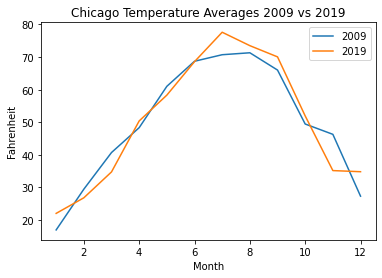

In [9]:
import matplotlib.pyplot as plt

x1 = np.arange(1,13,1)    
y1 = chi_09_month['Temp Avg'] 
plt.plot(x1, y1, label = "2009")
x2 = np.arange(1,13,1)  
y2 = chi_19_month['Temp Avg']
# plotting the line 2 points 
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Fahrenheit')
# Set a title of the current axes.
plt.title('Chicago Temperature Averages 2009 vs 2019')
# show a legend on the plot
plt.legend()
# CONVERT XTICK VALUES TO MONTHS


# Display a figure.
plt.show()

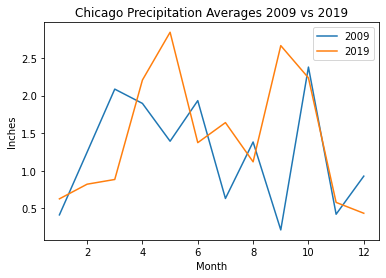

In [10]:
x1 = np.arange(1,13,1)    
y1 = chi_09_month['Precipitation'] 
plt.plot(x1, y1, label = "2009")
x2 = np.arange(1,13,1)  
y2 = chi_19_month['Precipitation']
# plotting the line 2 points 
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Inches') # HAO - DO YOU KNOW WHAT THE DATA SOURCE SAYS ABOUT MEASUREMENTS?
# Set a title of the current axes.
plt.title('Chicago Precipitation Averages 2009 vs 2019')
# show a legend on the plot
plt.legend()
# CONVERT XTICK VALUES TO MONTHS


# Display a figure.
plt.show()

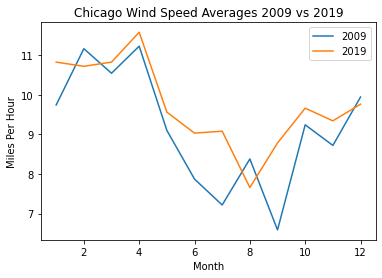

In [11]:
x1 = np.arange(1,13,1)    
y1 = chi_09_month['Wind Speed'] 
plt.plot(x1, y1, label = "2009")
x2 = np.arange(1,13,1)  
y2 = chi_19_month['Wind Speed']
# plotting the line 2 points 
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Miles Per Hour')
# Set a title of the current axes.
plt.title('Chicago Wind Speed Averages 2009 vs 2019')
# show a legend on the plot
plt.legend()
# CONVERT XTICK VALUES TO MONTHS


# Display a figure.
plt.show()

In [27]:
chi_09_max = chi_09_df.groupby(['Month']).max([['Max Temp', 'Precipitation', 'Snow']])
chi_09_max

,Temp Avg,Max Temp,Precipitation,Wind Speed
Month,,,,
1,27.68,37.94,4.094488,15.534280
2,55.22,61.88,17.952756,17.398393
3,59.90,73.94,19.527559,19.262507
4,69.44,84.74,12.795276,18.019765
5,72.86,84.74,14.803150,16.155651
6,84.56,93.20,14.842520,13.670166
7,76.64,85.82,5.354331,12.427424
8,84.38,91.76,10.787402,13.670166
9,73.04,84.02,4.330709,21.126621


In [28]:
chi_19_max = chi_19_df.groupby(['Month']).max([['Max Temp', 'Precipitation', 'Snow']])
chi_19_max

,Temp Avg,Max Temp,Precipitation,Wind Speed
Month,,,,
1,46.40,54.68,4.645669,19.883878
2,47.66,51.08,5.393701,24.233476
3,53.42,64.94,6.141732,19.883878
4,68.54,80.06,15.236220,22.369363
5,76.64,82.76,24.370079,14.912909
6,79.16,90.86,6.929134,15.534280
7,85.82,96.62,12.716535,13.670166
8,79.52,90.86,11.692913,13.048795
9,80.78,90.86,22.322835,13.048795


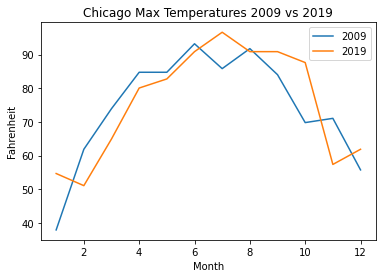

In [29]:
x1 = np.arange(1,13,1)    
y1 = chi_09_max['Max Temp'] 
plt.plot(x1, y1, label = "2009")
x2 = np.arange(1,13,1)  
y2 = chi_19_max['Max Temp']
# plotting the line 2 points 
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Fahrenheit')
# Set a title of the current axes.
plt.title('Chicago Max Temperatures 2009 vs 2019')
# show a legend on the plot
plt.legend()
# CONVERT XTICK VALUES TO MONTHS


# Display a figure.
plt.show()

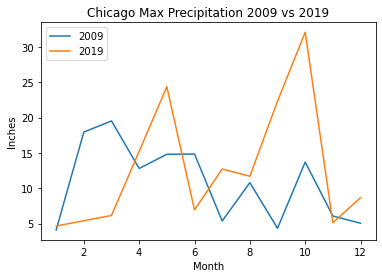

In [30]:
x1 = np.arange(1,13,1)    
y1 = chi_09_max['Precipitation'] 
plt.plot(x1, y1, label = "2009")
x2 = np.arange(1,13,1)  
y2 = chi_19_max['Precipitation']
# plotting the line 2 points 
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Inches')
# Set a title of the current axes.
plt.title('Chicago Max Precipitation 2009 vs 2019')
# show a legend on the plot
plt.legend()
# CONVERT XTICK VALUES TO MONTHS


# Display a figure.
plt.show()

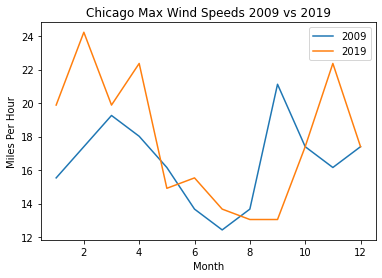

In [31]:
x1 = np.arange(1,13,1)    
y1 = chi_09_max['Wind Speed'] 
plt.plot(x1, y1, label = "2009")
x2 = np.arange(1,13,1)  
y2 = chi_19_max['Wind Speed']
# plotting the line 2 points 
plt.plot(x2, y2, label = "2019")
plt.xlabel('Month')
# Set the y axis label of the current axis.
plt.ylabel('Miles Per Hour')
# Set a title of the current axes.
plt.title('Chicago Max Wind Speeds 2009 vs 2019')
# show a legend on the plot
plt.legend()
# CONVERT XTICK VALUES TO MONTHS


# Display a figure.
plt.show()